In [166]:
# Aufgabe: Secretariat

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn.datasets
import numpy as np
import sys
from scipy.stats import norm
import scipy.stats as stats
import pylab as pl

np.set_printoptions(threshold=sys.maxsize)

# Import CSV
belmont = pd.read_csv("belmont.csv", sep = ';', decimal= ",")

# CSV Ausgabe
belmont

,Year,Winner,Jockey,Trainer,Owner,Time,Miliseconds,Track,miles,Unnamed: 9
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,148.51,Belmont,01. Mai,28.0
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,146.65,Belmont,01. Mai,NaN
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,148.52,Belmont,01. Mai,NaN
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,150.70,Belmont,01. Mai,NaN
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,150.42,Belmont,01. Mai,NaN
...,...,...,...,...,...,...,...,...,...,...
86,1930,Gallant Fox,Earl Sande,Jim Fitzsimmons,Belair Stud,2:31.60,151.60,Belmont,01. Mai,NaN
87,1929,Blue Larkspur,Mack Garner,Herbert J. Thompson,Edward R. Bradley,2:32.80,152.80,Belmont,01. Mai,NaN
88,1928,Vito,Clarence Kummer,Max Hirsch,Alfred H. Cosden,2:33.20,153.20,Belmont,01. Mai,NaN
89,1927,Chance Shot,Earl Sande,Pete Coyne,Joseph E. Widener,2:32.40,152.40,Belmont,01. Mai,NaN


In [168]:
#ECDF function
def ecdf(data):
    # number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x=np.sort(data)
    # y-data for the ECDF: y
    y=np.arange(1, n+1)/n
    return x,y
    
# Task: create a function to convert time to milliseconds
belmont['Seconds'] = belmont.Miliseconds.astype(float)
belmont['Miliseconds'] = belmont['Miliseconds'].astype(float) * 1000

belmont


,Year,Winner,Jockey,Trainer,Owner,Time,Miliseconds,Track,miles,Unnamed: 9,Seconds
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,148510.0,Belmont,01. Mai,28.0,148.51
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,146650.0,Belmont,01. Mai,NaN,146.65
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,148520.0,Belmont,01. Mai,NaN,148.52
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,150700.0,Belmont,01. Mai,NaN,150.70
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,150420.0,Belmont,01. Mai,NaN,150.42
...,...,...,...,...,...,...,...,...,...,...,...
86,1930,Gallant Fox,Earl Sande,Jim Fitzsimmons,Belair Stud,2:31.60,151600.0,Belmont,01. Mai,NaN,151.60
87,1929,Blue Larkspur,Mack Garner,Herbert J. Thompson,Edward R. Bradley,2:32.80,152800.0,Belmont,01. Mai,NaN,152.80
88,1928,Vito,Clarence Kummer,Max Hirsch,Alfred H. Cosden,2:33.20,153200.0,Belmont,01. Mai,NaN,153.20
89,1927,Chance Shot,Earl Sande,Pete Coyne,Joseph E. Widener,2:32.40,152400.0,Belmont,01. Mai,NaN,152.40


In [169]:
# use delimeters, try to check if all data are available
outlier_time_column = belmont["Time"]
outlier_time = outlier_time_column.max()
outlier_time

'2:34.00'

In [170]:
# find max value in the column
outlier_max_column = belmont["Time"]
outlier_max = outlier_max_column.max()
outlier_max

Year = belmont["Year"]

Time = (belmont["Seconds"].astype(float)/60)
Time

0     2.475167
1     2.444167
2     2.475333
3     2.511667
4     2.507000
        ...   
86    2.526667
87    2.546667
88    2.553333
89    2.540000
90    2.536667
Name: Seconds, Length: 91, dtype: float64

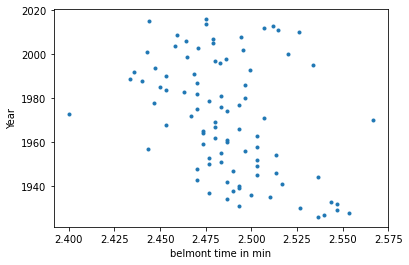

In [171]:
_ = plt.plot(Time, Year, '.')
_ = plt.xlabel('belmont time in min')
_ = plt.ylabel('Year')

In [172]:
Time = belmont["Seconds"]
mu_mean = np.mean(Time)
sigma_std = np.std(Time)
print('mean', mu_mean)
print('standard deviation', sigma_std)

# calculate Z-scores to find outliers
#Task: calc outliers using another methods see reccomandations

Z_scores = (Time - mu_mean)/sigma_std

Outliers_min = Z_scores.min()

# 1973 and 1970 years should be deleted from analysis

Outliers_max = Z_scores.max()
print('Outliers_min',Outliers_min*sigma_std + mu_mean)
print('Outliers_max', Outliers_max*sigma_std + mu_mean)

mean 149.21615384615387
standard deviation 1.7643501242516313
Outliers_min 144.0
Outliers_max 154.0


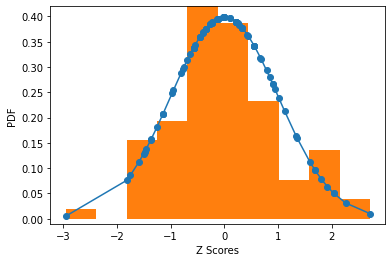

In [173]:
# sorted
h_1 = sorted(Z_scores)

# this is a fitting indeed
fit = stats.norm.pdf(h_1, np.mean(h_1), np.std(h_1))

pl.plot(h_1,fit,'-o')

# use this to draw histogram of your data
pl.hist(h_1,density=True)
              
# Make a legend, set limits and show plot
_ = plt.xlabel('Z Scores')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()

0     148.51
1     146.65
2     148.52
3     150.70
4     150.42
       ...  
86    151.60
87    152.80
88    153.20
89    152.40
90    152.20
Name: Seconds, Length: 91, dtype: float64 0    -0.400235
1    -1.454447
2    -0.394567
3     0.841016
4     0.682317
        ...   
86    1.351119
87    2.031256
88    2.257968
89    1.804543
90    1.691187
Name: Seconds, Length: 91, dtype: float64


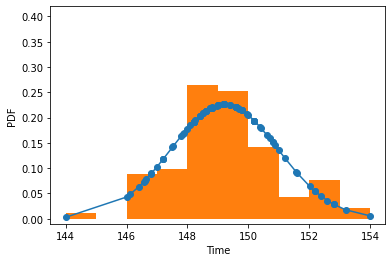

In [174]:
#Task 1: convert to array and print the whole array, combine two columns Time and Z-scores and Years and print as a table
#Task 2: delete outliers from the Time and print

print(Time,Z_scores)

# a normal distribution with outliers
# sorted
h = sorted(Time)

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

# use this to draw histogram of your data
pl.hist(h,density=True)

# Make a legend, set limits and show plot
_ = plt.xlabel('Time')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)

plt.show()

meand, std: 149.22101123595507 1.6186456017743405


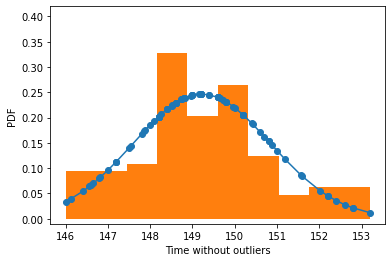

In [175]:
#a normal distribution without outliers

Time_without = [148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5, 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146, 146.4, 148.2 , 149.8 , 147,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ]
type(Time_without)

# Compute mean and standard deviation: mu, sigma
mu = np.mean(Time_without)
sigma = np.std(Time_without)

print('meand, std:', mu, sigma)

h = sorted(Time_without)  #sorted

# this is a fitting indeed
fit = stats.norm.pdf(h, np.mean(h), np.std(h))

pl.plot(h,fit,'-o')

# use this to draw histogram of your data
pl.hist(h,density=True)

# Make a legend, set limits and show plot
_ = plt.xlabel('Time without outliers')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()

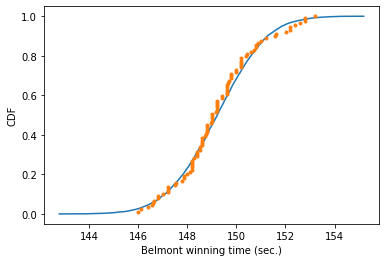

In [176]:
# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(Time_without)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

In [177]:
# to find out if it is possible to hit Secretariats record
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000608


In [187]:
# Time ist bereits in Sekunden und Millisekunden gegeben
# Minuten
belmont['Minutes'] = (belmont['Seconds'] / 60)

# Ausgabe
belmont

,Year,Winner,Jockey,Trainer,Owner,Time,Miliseconds,Track,miles,Unnamed: 9,Seconds,Minutes
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,148510.0,Belmont,01. Mai,28.0,148.51,2.475167
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,146650.0,Belmont,01. Mai,NaN,146.65,2.444167
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,148520.0,Belmont,01. Mai,NaN,148.52,2.475333
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,150700.0,Belmont,01. Mai,NaN,150.70,2.511667
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,150420.0,Belmont,01. Mai,NaN,150.42,2.507000
...,...,...,...,...,...,...,...,...,...,...,...,...
86,1930,Gallant Fox,Earl Sande,Jim Fitzsimmons,Belair Stud,2:31.60,151600.0,Belmont,01. Mai,NaN,151.60,2.526667
87,1929,Blue Larkspur,Mack Garner,Herbert J. Thompson,Edward R. Bradley,2:32.80,152800.0,Belmont,01. Mai,NaN,152.80,2.546667
88,1928,Vito,Clarence Kummer,Max Hirsch,Alfred H. Cosden,2:33.20,153200.0,Belmont,01. Mai,NaN,153.20,2.553333
89,1927,Chance Shot,Earl Sande,Pete Coyne,Joseph E. Widener,2:32.40,152400.0,Belmont,01. Mai,NaN,152.40,2.540000


In [190]:
def outlier(data):
    sorted(data)
    Q1,Q3 = np.percentile(data , [25,75])
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    return lower, upper

#Find Outliers
lower, upper = outlier(belmont['Seconds'])
# (arrInt < lower) | (arrInt > upper)
test_array = belmont['Seconds']
print(belmont['Seconds'].size)
print(test_array.size)

#Delete Outliers
deleted_array = test_array[(test_array > lower) & (test_array < upper)]
print(deleted_array.size)



91
91
88
